<a href="https://colab.research.google.com/github/hasun/ProgrammingCI/blob/master/6_2_EDA%26Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

from konlpy.tag import Okt

from functools import reduce
from wordcloud import WordCloud

     |████████████████████████████████| 19.4MB 1.6MB/s 
     |████████████████████████████████| 450kB 39.2MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
DATA_IN_PATH = './data_in/'

In [ ]:
data = pd.read_csv(DATA_IN_PATH + 'ChatBotData.csv', encoding='utf-8')

In [ ]:
data

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [ ]:
print(data.head())

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


In [ ]:
sentences = list(data['Q']) + list(data['A'])

In [ ]:
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Sentences')

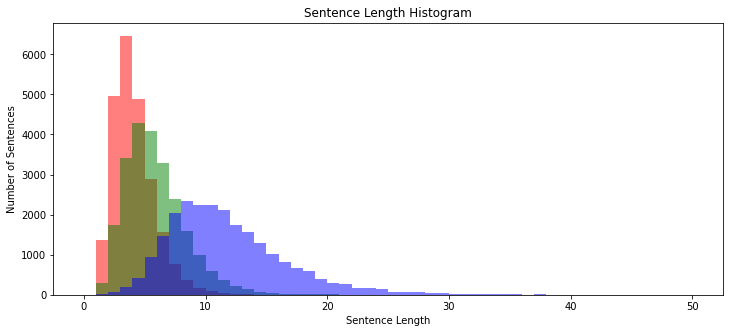

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

Text(0, 0.5, 'Number of Sentences')

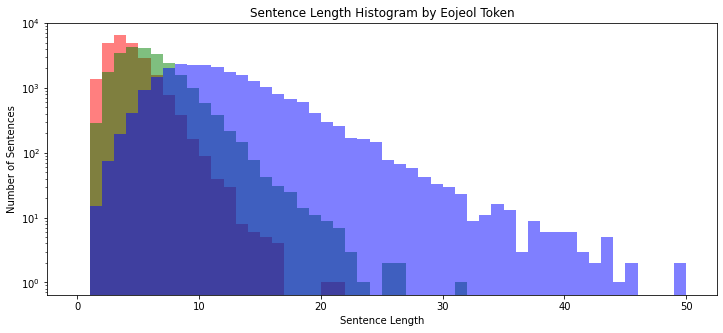

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color= 'r', label='eojeol')
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')
plt.yscale('log')
plt.title('Sentence Length Histogram by Eojeol Token')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Sentences')

In [ ]:
print('어절 최대길이: {}'.format(np.max(sent_len_by_token)))
print('어절 최소길이: {}'.format(np.min(sent_len_by_token)))
print('어절 평균길이: {:.2f}'.format(np.mean(sent_len_by_token)))
print('어절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_token)))
print('어절 중간길이: {}'.format(np.median(sent_len_by_token)))
print('제 1 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(sent_len_by_token, 75)))

어절 최대길이: 21
어절 최소길이: 1
어절 평균길이: 3.64
어절 길이 표준편차: 1.74
어절 중간길이: 3.0
제 1 사분위 길이: 2.0
제 3 사분위 길이: 5.0


In [ ]:
print('형태소 최대길이: {}'.format(np.max(sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.41
형태소 길이 표준편차: 2.56
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [ ]:
print('음절 최대길이: {}'.format(np.max(sent_len_by_eumjeol)))
print('음절 최소길이: {}'.format(np.min(sent_len_by_eumjeol)))
print('음절 평균길이: {:.2f}'.format(np.mean(sent_len_by_eumjeol)))
print('음절 길이 표준편차: {:.2f}'.format(np.std(sent_len_by_eumjeol)))
print('음절 중간길이: {}'.format(np.median(sent_len_by_eumjeol)))
print('음절 1/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 25)))
print('음절 3/4 퍼센타일 길이: {}'.format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대길이: 57
음절 최소길이: 1
음절 평균길이: 11.31
음절 길이 표준편차: 4.98
음절 중간길이: 10.0
음절 1/4 퍼센타일 길이: 8.0
음절 3/4 퍼센타일 길이: 14.0


{'boxes': [<matplotlib.lines.Line2D at 0x7fa213155310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa21302c310>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa21305f890>,
 'means': [<matplotlib.lines.Line2D at 0x7fa21305f350>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa21302cdd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa213155850>,
  <matplotlib.lines.Line2D at 0x7fa212fed4d0>]}

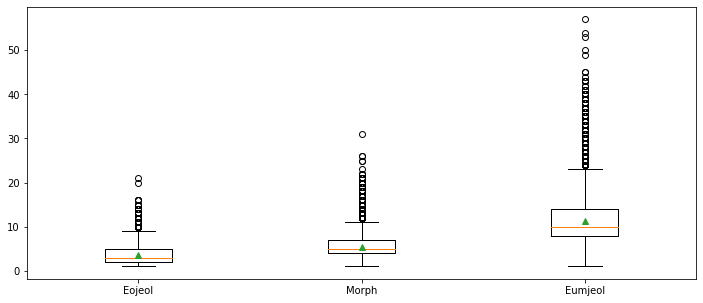

In [ ]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
            labels=['Eojeol', 'Morph', 'Eumjeol'], 
            showmeans=True)

In [ ]:
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

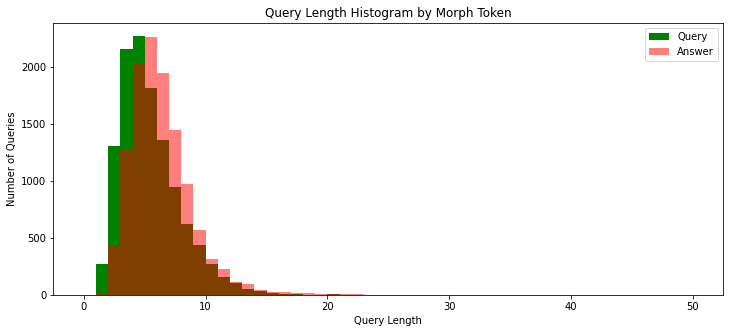

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

Text(0, 0.5, 'Number of Queries')

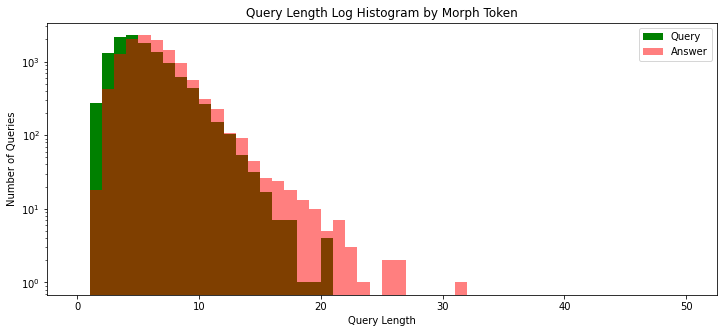

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0,50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0,50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Log Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

In [ ]:
print('형태소 최대길이: {}'.format(np.max(query_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(query_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(query_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(query_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(query_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(query_sent_len_by_morph, 75)))

형태소 최대길이: 20
형태소 최소길이: 1
형태소 평균길이: 4.95
형태소 길이 표준편차: 2.48
형태소 중간길이: 4.0
형태소 1/4 퍼센타일 길이: 3.0
형태소 3/4 퍼센타일 길이: 6.0


In [ ]:
print('형태소 최대길이: {}'.format(np.max(answer_sent_len_by_morph)))
print('형태소 최소길이: {}'.format(np.min(answer_sent_len_by_morph)))
print('형태소 평균길이: {:.2f}'.format(np.mean(answer_sent_len_by_morph)))
print('형태소 길이 표준편차: {:.2f}'.format(np.std(answer_sent_len_by_morph)))
print('형태소 중간길이: {}'.format(np.median(answer_sent_len_by_morph)))
print('형태소 1/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 25)))
print('형태소 3/4 퍼센타일 길이: {}'.format(np.percentile(answer_sent_len_by_morph, 75)))

형태소 최대길이: 31
형태소 최소길이: 1
형태소 평균길이: 5.87
형태소 길이 표준편차: 2.55
형태소 중간길이: 5.0
형태소 1/4 퍼센타일 길이: 4.0
형태소 3/4 퍼센타일 길이: 7.0


In [ ]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [ ]:
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)

for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

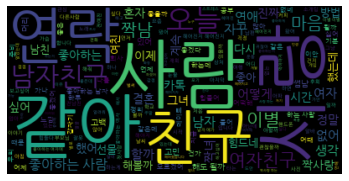

In [ ]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(query_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

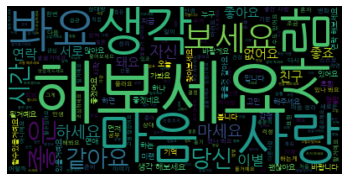

In [ ]:
query_wordcloud = WordCloud(font_path= DATA_IN_PATH + 'NanumGothic.ttf').generate(answer_NVA_token_sentences)

plt.imshow(query_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!python preprocess.py

In [ ]:
from preprocess import *

In [ ]:
PATH = 'data_in/ChatBotData.csv_short'
VOCAB_PATH = 'data_in/vocabulary.txt'

In [ ]:
inputs, outputs = load_data(PATH)

NameError: ignored